In [2]:
from tensorflow.keras import backend as K
K.clear_session()
!pip install rarfile

In [3]:
import os
import pandas as pd
import gdown
import rarfile
import shutil
from PIL import Image

# Install unrar (if not already installed - for Colab)
!apt-get install -y unrar

# Correct Google Drive URL for gdown
url = 'https://drive.google.com/uc?id=1imtuS9AzSLFZcNQcLBBTafIFd5JiQ21L'
#https://drive.google.com/file/d/1imtuS9AzSLFZcNQcLBBTafIFd5JiQ21L/view?usp=sharing
output_rar = '/content/kidney_cancer.rar'

# Download the rar file
gdown.download(url, output_rar, quiet=False)

# Extract the rar file
with rarfile.RarFile(output_rar, 'r') as rar_ref:
    rar_ref.extractall('/content')

# Check dataset folder contents
dataset_folder = '/content/kidney_cancer'
print(os.listdir(dataset_folder))


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


Downloading...
From (original): https://drive.google.com/uc?id=1imtuS9AzSLFZcNQcLBBTafIFd5JiQ21L
From (redirected): https://drive.google.com/uc?id=1imtuS9AzSLFZcNQcLBBTafIFd5JiQ21L&confirm=t&uuid=50f1b23a-81ef-4be0-8d60-4b1ea9eaba0f
To: /content/kidney_cancer.rar
100%|██████████| 362M/362M [00:10<00:00, 35.3MB/s]


['train', 'Test']


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 171 images belonging to 5 classes.
Found 106 images belonging to 5 classes.
Detected Classes: {'Grade0': 0, 'Grade1': 1, 'Grade2': 2, 'Grade3': 3, 'Grade4': 4}
Number of Classes: 5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         5,125 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,944,581 (57.01 MB)

 Trainable params: 14,944,581 (57.01 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 44s 8s/step - accuracy: 0.2043 - loss: 1.8990 - val_accuracy: 0.2083 - val_loss: 1.6090
Epoch 2/10
1/5 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.0625 - loss: 1.6115

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.0625 - loss: 1.6115 - val_accuracy: 0.2083 - val_loss: 1.6091
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 38s 9s/step - accuracy: 0.2489 - loss: 1.6025 - val_accuracy: 0.2708 - val_loss: 1.6232
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.2500 - loss: 1.6047 - val_accuracy: 0.2604 - val_loss: 1.6250
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 42s 8s/step - accuracy: 0.3051 - loss: 1.5910 - val_accuracy: 0.1042 - val_loss: 1.7641
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.0625 - loss: 1.7318 - val_accuracy: 0.1042 - val_loss: 1.6886
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 82s 15s/step - accuracy: 0.2484 - loss: 1.5628 - val_accuracy: 0.2708 - val_loss: 1.6206
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.3125 - loss: 1.5535 - val_accuracy: 0.3958 - val_loss: 1.6196
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 82s 19s/step - accuracy: 0.3752 - loss: 1.5650 - val_accuracy: 0.2292 - val_loss: 1.6536
Epoch 10/10
5/5 ━

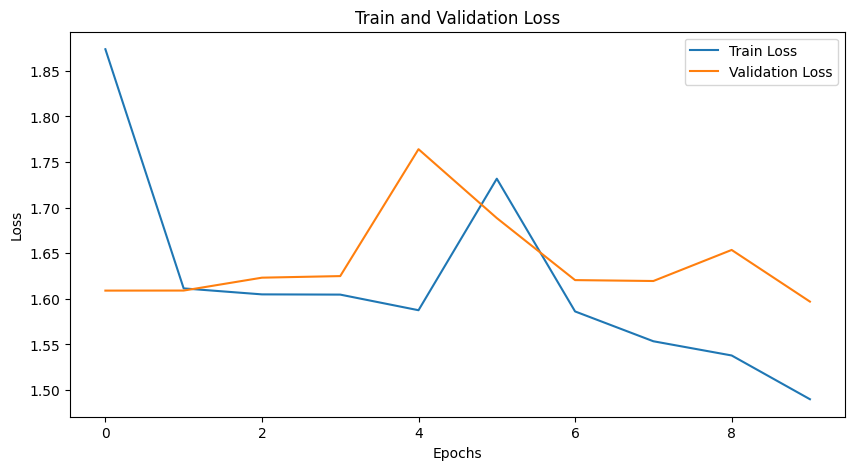

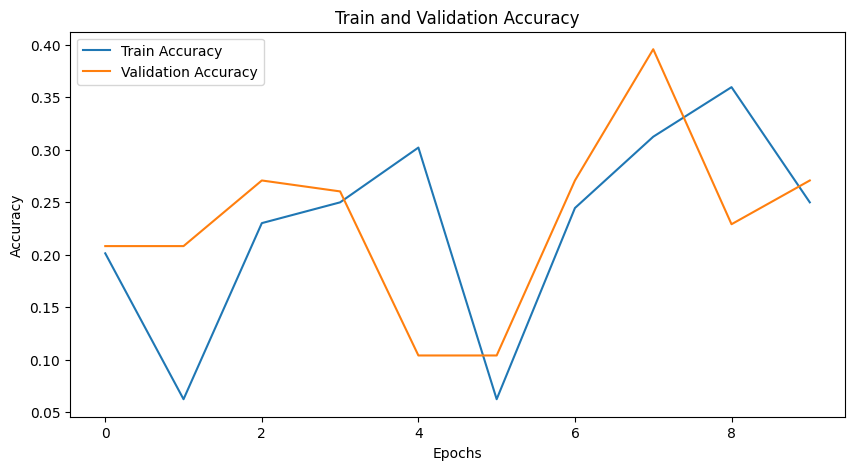

4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.2223 - loss: 1.6441
Test Loss: 1.5916, Test Accuracy: 0.2642


In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Parameters
img_size = (224, 224)
batch_size = 32
epochs = 10
input_shape = (224, 224, 3)

# Data directories
data_dir_train = '/content/kidney_cancer/train'
data_dir_test = '/content/kidney_cancer/Test'

# Data preprocessing
datagen = ImageDataGenerator(rescale=1.0 / 255)

train_data_generator = datagen.flow_from_directory(
    data_dir_train,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_data_generator = datagen.flow_from_directory(
    data_dir_test,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Detect number of classes dynamically
num_classes = train_data_generator.num_classes
print("Detected Classes:", train_data_generator.class_indices)
print("Number of Classes:", num_classes)

# Define CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Output layer updated

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(
    train_data_generator,
    epochs=epochs,
    steps_per_epoch=train_data_generator.samples // batch_size,
    validation_data=test_data_generator,
    validation_steps=test_data_generator.samples // batch_size,
    verbose=1
)

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Validation Loss')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train and Validation Accuracy')
plt.show()

# Evaluate model
test_loss, test_accuracy = model.evaluate(test_data_generator)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Directory
data_dir_test = '/content/kidney_cancer/train'

# Get class names from subdirectories
class_names = sorted(os.listdir(data_dir_test))
print("Classes:", class_names)

# Container for image paths and true labels
image_paths = []
true_labels = []

# Collect 5 images per class
for label in class_names:
    class_path = os.path.join(data_dir_test, label)
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    for img_file in images[:5]:  # Take first 5
        image_paths.append(os.path.join(class_path, img_file))
        true_labels.append(label)

# Predict and display
for i, img_path in enumerate(image_paths):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    # Show
    plt.figure(figsize=(3, 3))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Actual: {true_labels[i]}\nPredicted: {predicted_class}")
    plt.show()


Output hidden; open in https://colab.research.google.com to view.